In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

plt.style.use('../code_snippets_settings/matplotlibrc') # this file sets our global settings for plotting(makes less bloated in the notebook)


path = 'https://www.openintro.org/data/csv/' # url path to openintro.org data # access remote source

# path = %pwd # local path if you had downloaded the data
# path += '/csv/' 

# 1.9.1 Case study: using stents to prevent strokes

---

## 1.1 Migraine and acupuncture

In [2]:
df1 = pd.read_csv(path+'/migraine.csv')
df1 = (df1.groupby('group')
      .agg([('value_counts')])  # creates n columns from n category frequency counts
      .unstack(1)
      .droplevel(1, axis=1)
      .droplevel(0, axis=1) # if this isnt dropped, use commented out code below for fancy switching
      )

# df = (df.loc[['treatment', 'control']]               # swaps index rows
#       [[('pain_free', 'yes'), ('pain_free','no')]])  # swaps multi-index columns
df1['total'] = df1.sum(1)
df1 = df1.append(df1.sum().rename('total'))
treatment = round(df1.loc['treatment', 'yes']/df1.loc['treatment', 'total']*100, 1)
control = round(df1.loc['control', 'yes']/df1.loc['control', 'total']*100, 1)
total = round(df1.loc['total', 'yes']/df1.loc['control', 'total']*100, 1)
print(df1)
print(f"\nTreatment group pain-free outcome?\n{treatment}%")
print(f"\nControl group pain-free outcome?\n{control}%")
print(f"\nTotal pain-free outcome?\n{total}%")

pain_free  no  yes  total
group                    
control    44    2     46
treatment  33   10     43
total      77   12     89

Treatment group pain-free outcome?
23.3%

Control group pain-free outcome?
4.3%

Total pain-free outcome?
26.1%


## 1.2 Sinusitis and antibiotics

In [3]:
df2 = pd.read_csv(path+'/sinusitis.csv')

df2 = (df2.groupby('group')
      .agg([('value_counts')])  # creates n columns from n category frequency counts
      .unstack(1)
      .droplevel(1, axis=1)
      .droplevel(0, axis=1) # if this isnt dropped, use commented out code below for fancy switching
      )
# df = (df.loc[['treatment', 'control']]               # swaps index rows
#       [[('pain_free', 'yes'), ('pain_free','no')]])  # swaps multi-index columns
df2['total'] = df2.sum(1)
df2 = df2.append(df2.sum().rename('total'))

treatment = round(df2.loc['treatment', 'yes']/df2.loc['treatment', 'total']*100, 1)
control = round(df2.loc['control', 'yes']/df2.loc['control', 'total']*100, 1)
print(df2)
print(f"\nTreatment group outcome?\n{treatment}%")
print(f"\nControl group outcome?\n{control}%")

self_reported_improvement  no  yes  total
group                                    
control                    16   65     81
treatment                  19   66     85
total                      35  131    166

Treatment group outcome?
77.6%

Control group outcome?
80.2%


---

# 1.9.2 Data basics

## 1.3 Air pollution and birth outcomes, study components

a) study subjects born between 1989 and 1993  
b) continuous numerical variables    
c) is there a relationship between air pollution and pre-term births  

## 1.4 Buteyko method, study components

a) 600 asthma patients ages 18-69 on asthma medication  
b) (quality of life, activity, asthma symptoms, medication reduction): discrete numerical variables 0-10  
c) can the Buteyko method reduce asthma syptoms and improve quality of life

## 1.5 Cheaters, study components

a) 160 children aged 5-15  
b) age: continuous numerical, sex: categorical, only child: categorical, cheated or not: categorical  
c) does telling children not to cheat affect likelihood of them cheating

## 1.6 Stealing, study components

a) 129 University of California undergraduates  
b) most/least money: categorical, most/least education: categorical, most/least respected jobs: categorical  
c) is there a relationship taking/giving candy and self reported socio-economic class  

## 1.7 Fisher's irises

a) 150 cases  
b) 4 numeric continuous variables(sepal length and width, petal length and width) all   
c) 3 regular categorical variables(setosa, versicolor, virginica)  

## 1.8 Smoing habits of UK residents

a) case == resident  
b) 1691 participants  
c)   
categorical         : (sex, marital, smoke)  
ordinal categorical : (grossIncome, amtWeekends, amtWeekdays)  
continuous numerical: (age)  

---

# 1.9.3 Overview of data collection principals

![Figure](https://jethinabrahamcom.files.wordpress.com/2017/02/scope-of-ineference.png?w=720 "Figure")

## 1.9 Air pollution and birth outcomes, scope of inference

a) population of interest: all births,  
sample: southern California births from 89' to 93'   
b) the sample can be used to generalize the population of Southern California.   
since the study is observational, it cannot be used to establish causal relationships between variables


## 1.10 Cheaters, scope of inference

a) pop of interest: children ages 5-15, sample: 160 children aged 5-15   
b) not generalizable no random sampling  
cant be used to establish causal relationship: no random assignment  

## 1.11 Buteyko method, scope of inference

a) population of interest: patients with asthma aged 18-69 on meds, sample: 600 patients of same description    
b) generalizable to the population of interest, experimental random assignment: CAN be used to establish causal relationship with this sample  

## 1.12 Stealers, scope of inference

a) population of interest: UC Berkeley undergrads, sample: 129 such cases  
b) generalizable to population of interest, students self-assigned so no causal relationship can be established

## 1.13 Relaxing after work

a) observation  
b) variable  
c) sample statistic (mean)  
d) population parameter (mean)  

## 1.14 Cats on YouTube

a) population parameter: % of cat videos on youtube  
b) sample statistic: 2%  
c) observation: each video in sample  
d) variable: cat video, yes/no  

## 1.15 GPA and study hours

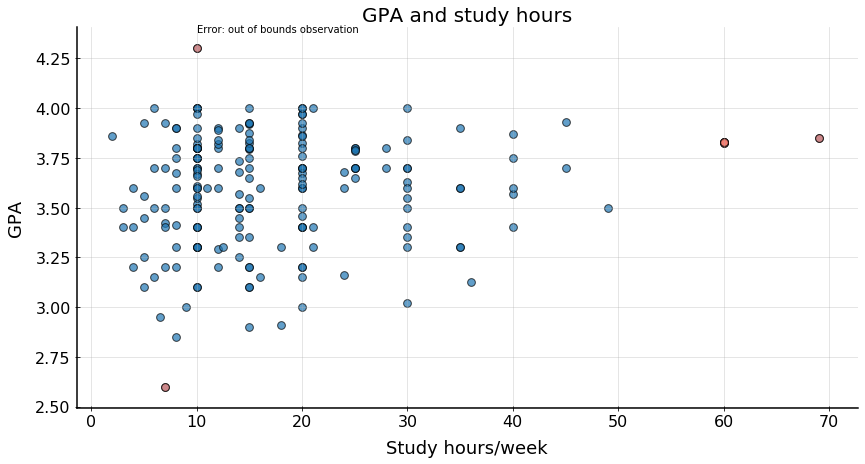

In [4]:
df3 = pd.read_csv(path+'/gpa_study_hours.csv')

outliers = df3[(df3.gpa > df3.gpa.quantile(0.995)) | 
               (df3.gpa < df3.gpa.quantile(0.005)) |
               (df3.study_hours > df3.study_hours.quantile(0.980))]

error = (df3.iloc[df3.gpa.idxmax(axis=0), :]+0.08).to_list()[::-1] # for annotating error

df3.plot.scatter(x='study_hours', y='gpa', alpha=0.7, s=60).set(xlabel='Study hours/week', ylabel='GPA', title='GPA and study hours');
plt.scatter(data=outliers, x='study_hours', y='gpa', alpha=0.7, s=60, c='salmon');
plt.text(x=error[0], y=error[1], s='Error: out of bounds observation');

a) explanatory var: study hours, response var: gpa   
b) seems to be a positive a weak positive correlation between hours studied and gpa. there is one gpa observation that is over 4.0.  
c) observational study  
d) we connot conclude anything because this is an observational study and not an experimental study

## 1.16 Income and education in US countries

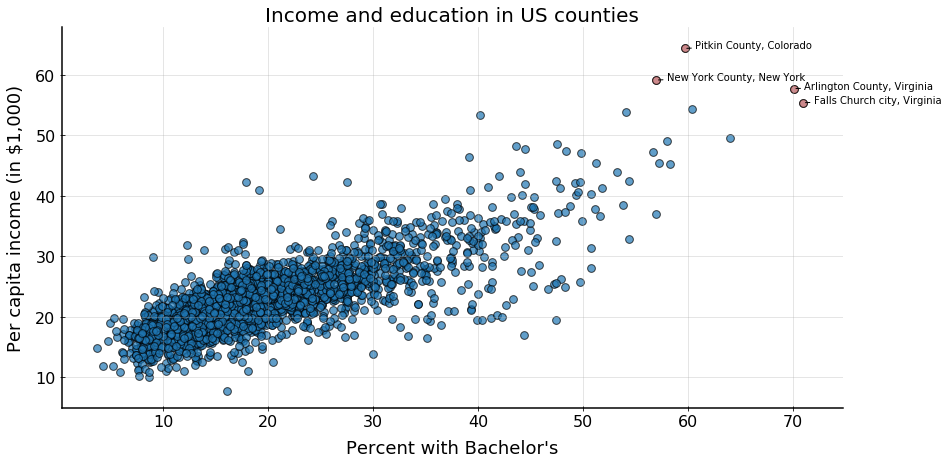

In [10]:
df4 = pd.read_csv('./csv/county_complete.csv')[['state', 'name', 'pop2010', 'bachelors_2010', 'per_capita_income_2010']]

(df4.plot.scatter(x='bachelors_2010', y='per_capita_income_2010', alpha=0.7, s=60)
.set(xlabel="Percent with Bachelor's", 
     ylabel="Per capita income (in $1,000)", 
     title='Income and education in US counties',
     yticklabels=np.arange(0, 70, 10)));
outliers = df4[df4.per_capita_income_2010 > df4.per_capita_income_2010.quantile(.999)]
plt.scatter(data=outliers, x='bachelors_2010', y='per_capita_income_2010', alpha=0.7, s=60, c='salmon');

# offset = [ 5,  10,  9, 11, 13, 15, 17]
for i in range(outliers.shape[0]):
    county = F"{outliers.name.tolist()[i]}, {outliers.state.tolist()[i]}"
    x, y = outliers.bachelors_2010.tolist()[i], outliers.per_capita_income_2010.tolist()[i]
    plt.annotate(county,(x,y),xytext=(x+1, y+1),
                     arrowprops = dict(arrowstyle = "-"))

a) explanatory var: percent bachelor degree, response var: per capita income  
b) there seems to be a positive correlation with percentage of bachelor degrees and income. 